In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import rcParams
from sklearn.model_selection import KFold

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('.'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

./__notebook__.ipynb


In [2]:
data_path = "../input/titanic/train.csv"
df = pd.read_csv(data_path)
data_path_test = "../input/titanic/test.csv"
df_test = pd.read_csv(data_path_test)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Drop the passenger id, as it brings no value to us

In [4]:
df = df.drop('PassengerId', axis=1)
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [7]:
df['HasCabin'] = (df['Cabin'].notnull()).astype(np.uint8)
df = df.drop('Cabin', axis=1)
df_test['HasCabin'] = (df_test['Cabin'].notnull()).astype(np.uint8)
df_test = df_test.drop('Cabin', axis=1)

In [8]:
df.HasCabin.sum()

204

We can delete inputs without Embarked since there are only 2 of them.

In [9]:
df = df[df['Embarked'].notna()]

In [10]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,HasCabin
count,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681,0.227222
std,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504,0.419273
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [11]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']

In [12]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,HasCabin,FamilySize
count,889.000000,889.000000,712.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.642093,0.524184,0.382452,32.096681,0.227222,0.906637
std,0.486260,0.834700,14.492933,1.103705,0.806761,49.697504,0.419273,1.614703
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,10.000000


In [13]:
import re
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    if title_search:
        return title_search.group(1)
    return ""

In [14]:
df['Title'] = df['Name'].apply(get_title)
df_test['Title'] = df_test['Name'].apply(get_title)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin,FamilySize,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,1,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,Mr


In [15]:
df.Title.value_counts()

Mr          517
Miss        181
Mrs         124
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Jonkheer      1
Capt          1
Lady          1
Sir           1
Countess      1
Mme           1
Don           1
Ms            1
Name: Title, dtype: int64

In [16]:
df_test.Title.value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Dona        1
Ms          1
Name: Title, dtype: int64

In [17]:
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Countess', 'Capt', 'Sir', 'Lady', 'Don', 'Jonkheer', 'Dona'], 'Rare')
df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df_test['Title'] = df_test['Title'].replace(['Dr', 'Rev', 'Major', 'Col', 'Countess', 'Capt', 'Sir', 'Lady', 'Don', 'Jonkheer', 'Dona'], 'Rare')
df_test['Title'] = df_test['Title'].replace(['Mlle', 'Ms'], 'Miss')
df_test['Title'] = df_test['Title'].replace('Mme', 'Mrs')    

In [18]:
df.Title.value_counts()

Mr        517
Miss      184
Mrs       125
Master     40
Rare       23
Name: Title, dtype: int64

In [19]:
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

In [20]:
imputer = KNNImputer()
imputed_data = imputer.fit_transform(df[['Pclass', 'SibSp', 'Parch', 'Fare', 'Age', 'FamilySize']])
df_temp = pd.DataFrame(imputed_data)
df_temp.columns = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Age', 'FamilySize']
df['Age'] = df_temp['Age']
imputed_data_test = imputer.transform(df_test[['Pclass', 'SibSp', 'Parch', 'Fare', 'Age', 'FamilySize']])
df_temp = pd.DataFrame(imputed_data)
df_temp.columns = ['Pclass', 'SibSp', 'Parch', 'Fare', 'Age', 'FamilySize']
df_test['Age'] = df_temp['Age']

In [21]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(df[["Fare"]])
df_test['Fare'] = imputer.transform(df_test[["Fare"]]).ravel()
df['Age'] = imputer.fit_transform(df[["Age"]]);


In [22]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,HasCabin,FamilySize
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,30.107112,0.524184,0.382452,32.096681,0.227222,0.906637
std,0.486260,0.834700,13.376148,1.103705,0.806761,49.697504,0.419273,1.614703
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.700000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,0.000000,3.000000,29.200000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,1.000000,3.000000,38.300000,1.000000,0.000000,31.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,10.000000


In [23]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,HasCabin,FamilySize
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,29.308455,0.447368,0.392344,35.618742,0.217703,0.839713
std,120.810458,0.841838,13.203072,0.896760,0.981429,55.840767,0.413179,1.519072
min,892.000000,1.000000,0.830000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.100000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,1100.500000,3.000000,28.900000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,1204.750000,3.000000,37.600000,1.000000,0.000000,31.500000,0.000000,1.000000
max,1309.000000,3.000000,71.000000,8.000000,9.000000,512.329200,1.000000,10.000000


## Graphs

In [24]:
rcParams['figure.figsize'] = (10, 5)

In [25]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin,FamilySize,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,1,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,1,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,0,Mr


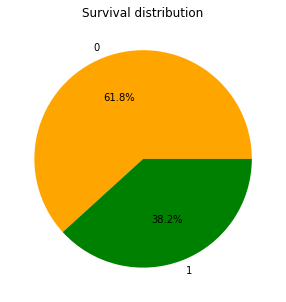

In [26]:
survival_numbers = df['Survived'].value_counts()
plt.pie(survival_numbers.values, labels=survival_numbers.index, autopct='%1.1f%%', colors=["orange", "green"])
plt.title("Survival distribution")
plt.show()

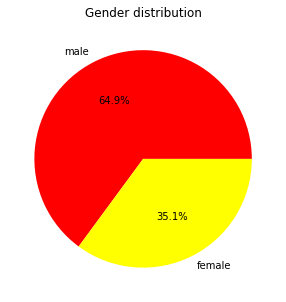

In [27]:
sex_numbers = df['Sex'].value_counts()
plt.pie(sex_numbers.values, labels=sex_numbers.index, autopct='%1.1f%%', colors=["red", "yellow"])
plt.title("Gender distribution")
plt.show()

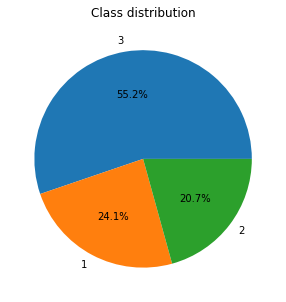

In [28]:
pclass_numbers = df['Pclass'].value_counts()
plt.pie(pclass_numbers.values, labels=pclass_numbers.index, autopct='%1.1f%%')
plt.title("Class distribution")
plt.show()

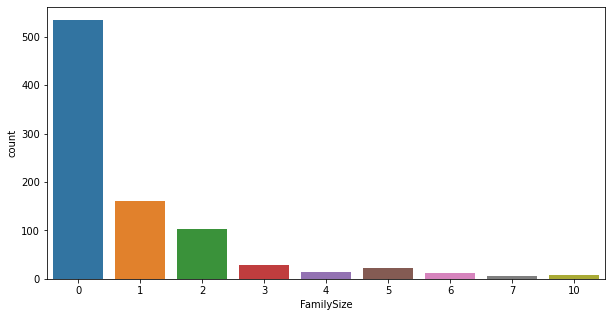

In [29]:
sns.countplot(x="FamilySize", data=df);

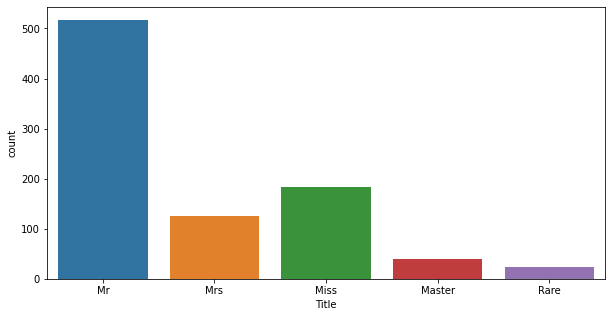

In [30]:
sns.countplot(x="Title", data=df);

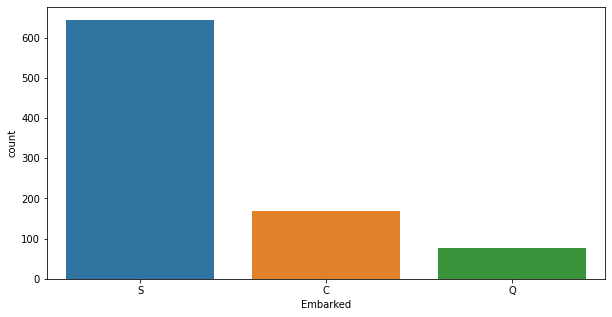

In [31]:
sns.countplot(x="Embarked", data=df);

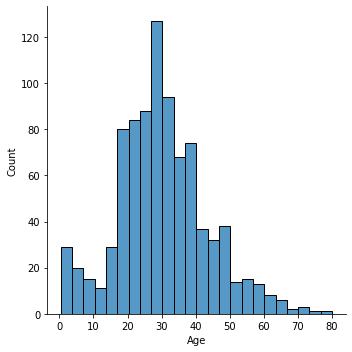

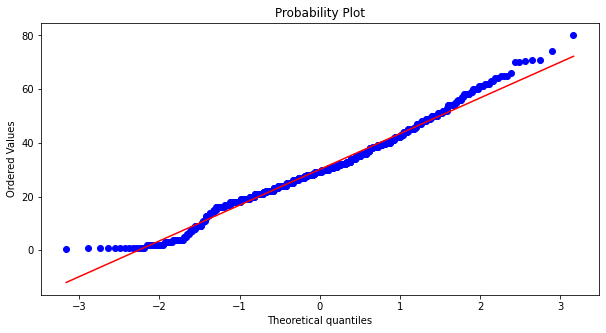

In [32]:
sns.displot(df['Age']);
fig = plt.figure()
res = stats.probplot(df['Age'], plot=plt)

In [33]:
print("Skewness: %f" % df['Age'].skew())
print("Kurtosis: %f" % df['Age'].kurt())

Skewness: 0.328628
Kurtosis: 0.505784


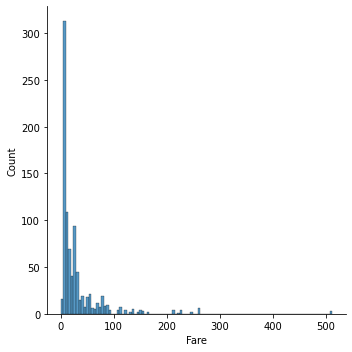

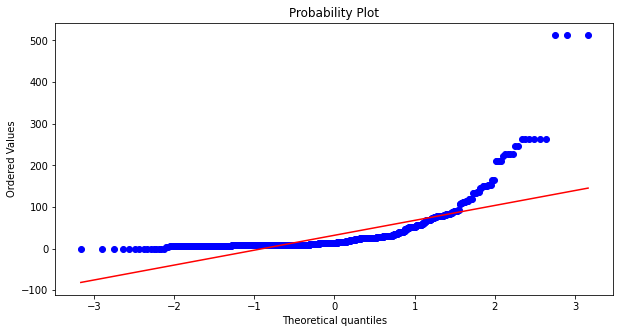

In [34]:
sns.displot(df['Fare']);
fig = plt.figure()
res = stats.probplot(df['Fare'], plot=plt)

In [35]:
print("Skewness: %f" % df['Fare'].skew())
print("Kurtosis: %f" % df['Fare'].kurt())

Skewness: 4.801440
Kurtosis: 33.508477


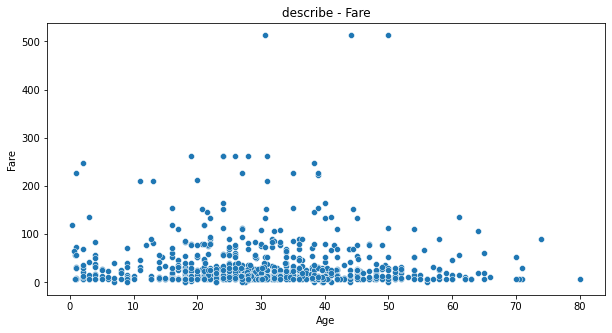

In [36]:
plt.title("describe - Fare")
sns.scatterplot(x="Age", y="Fare", data=df);

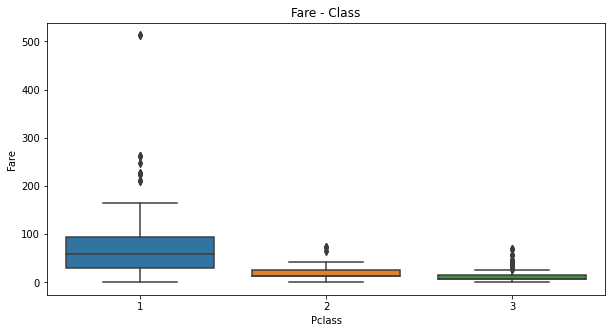

In [37]:
plt.title("Fare - Class")
sns.boxplot(x="Pclass", y="Fare", data=df);

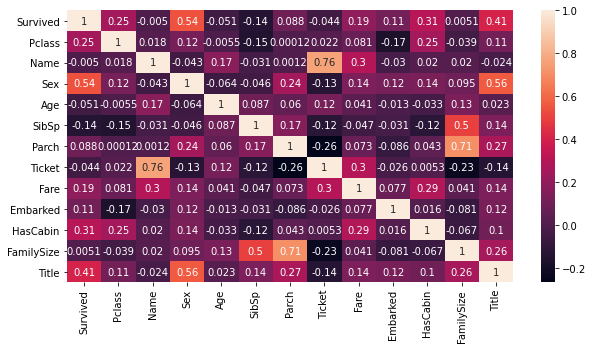

In [38]:
sns.heatmap(df.apply(lambda x: x.factorize()[0]).corr(), annot=True);

## Encoding data

In [39]:
df_encoded = df.copy()
df_test_encoded = df_test.copy()
df_encoded['Sex'] = (df_encoded['Sex'] == 'female').astype(np.uint8)
df_test_encoded['Sex'] = (df_test_encoded['Sex'] == 'female').astype(np.uint8)

In [40]:
df_encoded = pd.get_dummies(df_encoded, columns=['Embarked'], prefix='Embarked', drop_first=True)
df_test_encoded = pd.get_dummies(df_test_encoded, columns=['Embarked'], prefix='Embarked', drop_first=True)

In [41]:
df_encoded = pd.get_dummies(df_encoded, columns=['Pclass'], prefix='Pclass', drop_first=True)
df_test_encoded = pd.get_dummies(df_test_encoded, columns=['Pclass'], prefix='Pclass', drop_first=True)

In [42]:
df_encoded = pd.get_dummies(df_encoded, columns=['Title'], prefix='Title', drop_first=True)
df_test_encoded = pd.get_dummies(df_test_encoded, columns=['Title'], prefix='Title', drop_first=True)

In [43]:
df.Ticket.unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '36973', '347088', 'PC 17605', '2661', 'C.A. 29395',
       'S.P. 3464', '3101281', '315151', 'C.A. 33111', 'S.O.C. 14879',
       '2680', '1601', '348123', '349208', '374746', '248738', '364516',
       '345767', '345779', '330932', '113059', 'SO/C 14885', '3101278',
       'W./C

In [44]:
df_encoded = df_encoded.drop(['Name', 'Ticket', 'SibSp', 'Parch'], axis=1)
df_test_encoded = df_test_encoded.drop(['Name', 'Ticket', 'SibSp', 'Parch'], axis=1)
df_encoded.head()

,Survived,Sex,Age,Fare,HasCabin,FamilySize,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Title_Miss,Title_Mr,Title_Mrs,Title_Rare
0,0,0,22.0,7.2500,0,1,0,1,0,1,0,1,0,0
1,1,1,38.0,71.2833,1,1,0,0,0,0,0,0,1,0
2,1,1,26.0,7.9250,0,0,0,1,0,1,1,0,0,0
3,1,1,35.0,53.1000,1,1,0,1,0,0,0,0,1,0
4,0,0,35.0,8.0500,0,0,0,1,0,1,0,1,0,0


In [45]:
from scipy.stats import zscore

In [46]:
fare_outliers = df_encoded["Fare"][(np.abs(zscore(df["Fare"])) > 3)]
fare_outliers

27     263.0000
88     263.0000
118    247.5208
258    512.3292
299    247.5208
311    262.3750
341    263.0000
377    211.5000
380    227.5250
438    263.0000
527    221.7792
557    227.5250
679    512.3292
689    211.3375
700    227.5250
716    227.5250
730    211.3375
737    512.3292
742    262.3750
779    211.3375
Name: Fare, dtype: float64

In [47]:
X = df_encoded.drop('Survived', axis=1)
y = df_encoded.Survived
X_test = df_test_encoded

In [48]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
pd.options.mode.chained_assignment = None

In [49]:
cols = ["Age", "Fare"]
scaler = StandardScaler()

for c in cols:
    X[c] = scaler.fit_transform(X[[c]])
    X_test[c] = scaler.transform(X_test[[c]])
print('{} {}'.format(X.Fare.describe(), X.Age.describe()))

count    8.890000e+02
mean     1.092115e-16
std      1.000563e+00
min     -6.462044e-01
25%     -4.872378e-01
50%     -3.551972e-01
75%     -2.207954e-02
max      9.668551e+00
Name: Fare, dtype: float64 count    8.890000e+02
mean    -3.724680e-17
std      1.000563e+00
min     -2.220656e+00
25%     -6.288690e-01
50%     -6.785378e-02
75%      6.128446e-01
max      3.732089e+00
Name: Age, dtype: float64


## Models

In [50]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [51]:
class ClassifierDecorator(object):
    def __init__(self, clf, seed=0, params=None):
        if seed != -1:
            params['random_state'] = seed
        self.clf = clf(**params)
        
    def fit(self, x, y):
        return self.clf.fit(x, y)
    
    def predict(self, x):
        return self.clf.predict(x)
    
    def feature_importances(self, x, y):
        importances = self.fit(x,y).feature_importances_
        return importances
    

In [52]:
def get_oof(clf, x_train, y_train, x_test, nfolds, seed=0):
    kf = KFold(nfolds, shuffle=True, random_state=seed)
    oof_train = np.zeros((x_train.shape[0],))
    oof_test = np.zeros((x_test.shape[0],))
    oof_test_skf = np.empty((nfolds, x_test.shape[0]))
    
    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]
        
        clf.fit(x_tr, y_tr)
        
        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)
    
    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [53]:
pass_ids = X_test.PassengerId
X_test = X_test.drop('PassengerId', axis=1)

In [54]:
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
     'warm_start': False, 
     #'max_features': 0.2,
    'max_depth': 6,
    'min_samples_leaf': 2,
    'max_features' : 'sqrt',
    'verbose': 0
}

# Extra Trees Parameters
et_params = {
    'n_jobs': -1,
    'n_estimators':500,
    #'max_features': 0.5,
    'max_depth': 8,
    'min_samples_leaf': 2,
    'verbose': 0
}

# AdaBoost parameters
ada_params = {
    'n_estimators': 500,
    'learning_rate' : 0.75
}

# Gradient Boosting parameters
gb_params = {
    'n_estimators': 500,
     #'max_features': 0.2,
    'max_depth': 5,
    'min_samples_leaf': 2,
    'verbose': 0
}

# Support Vector Classifier parameters 
svc_params = {
    'kernel' : 'linear',
    'C' : 0.025
    }

# Logistic Regression parameters
lr_params = {
    'C' : 10,
    'solver' : 'lbfgs',
    'max_iter' : 1000
}

# MLPClassifier parameters
mlp_params = {
    'alpha' : 0.0001,
    'hidden_layer_sizes' : (5,),
    'learning_rate' : 'constant',
    'max_iter' : 1000
}

# KNeighbors classifier parameters
kn_params = {
    'weights' : 'distance',
}

In [55]:
rf = ClassifierDecorator(clf=RandomForestClassifier, params=rf_params)
et = ClassifierDecorator(clf=ExtraTreesClassifier, params=et_params)
ada = ClassifierDecorator(clf=AdaBoostClassifier, params=ada_params)
gb = ClassifierDecorator(clf=GradientBoostingClassifier, params=gb_params)
svc = ClassifierDecorator(clf=SVC, params=svc_params)
lr = ClassifierDecorator(clf=LogisticRegression, params=lr_params)
mlp = ClassifierDecorator(clf=MLPClassifier, params=mlp_params)
kn = ClassifierDecorator(clf=KNeighborsClassifier, seed=-1, params=kn_params)

In [56]:
X_train = X.values
X_test = X_test.values
y = y.ravel()

In [57]:
rf_oof_train, rf_oof_test = get_oof(rf, X_train, y, X_test, 5)
et_oof_train, et_oof_test = get_oof(et, X_train, y, X_test, 5)
ada_oof_train, ada_oof_test = get_oof(ada, X_train, y, X_test, 5)
gb_oof_train, gb_oof_test = get_oof(gb, X_train, y, X_test, 5)
svc_oof_train, svc_oof_test = get_oof(svc, X_train, y, X_test, 5)
lr_oof_train, lr_oof_test = get_oof(lr, X_train, y, X_test, 5)
mlp_oof_train, mlp_oof_test = get_oof(mlp, X_train, y, X_test, 5)
kn_oof_train, kn_oof_test = get_oof(kn, X_train, y, X_test, 5)

In [58]:
features = X.columns.values
feature_df = pd.DataFrame(
    {
        'features': features,
        'Random forest features': rf.feature_importances(X_train,y),
        'Extra trees features': et.feature_importances(X_train,y),
        'Ada boost features': ada.feature_importances(X_train,y),
        'Gradient boosting features': gb.feature_importances(X_train,y),
    }
)

In [59]:
mean_features = feature_df.mean(axis=1)
data = [go.Bar(
            x= features,
             y= mean_features,
            width = 0.5,
            marker=dict(
               color = mean_features,
            colorscale='Portland',
            showscale=True,
            reversescale = False
            ),
            opacity=0.6
        )]

layout= go.Layout(
    autosize= True,
    title= 'Barplots of Mean Feature Importance',
    hovermode= 'closest',
    yaxis=dict(
        title= 'Feature Importance',
        ticklen= 5,
        gridwidth= 2
    ),
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='bar-direct-labels')

In [60]:
base_predictions_train = pd.DataFrame(
    {
        'Random forest': rf_oof_train.ravel(),
        'Extra trees': et_oof_train.ravel(),
        'Ada boost': ada_oof_train.ravel(),
        'Gradient boosting': gb_oof_train.ravel(),
        'SVC': svc_oof_train.ravel(),
        'LR': lr_oof_train.ravel(),
        'MLP': mlp_oof_train.ravel(),
        'K Neighbours': kn_oof_train.ravel()
    }
)
base_predictions_train.head()

,Random forest,Extra trees,Ada boost,Gradient boosting,SVC,LR,MLP,K Neighbours
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
data = [
    go.Heatmap(
        z= base_predictions_train.astype(float).corr().values ,
        x=base_predictions_train.columns.values,
        y= base_predictions_train.columns.values,
          colorscale='Viridis',
            showscale=True,
            reversescale = True
    )
]
py.iplot(data, filename='labelled-heatmap')

In [62]:
x_train = np.concatenate((rf_oof_train, et_oof_train, ada_oof_train, gb_oof_train, svc_oof_train, lr_oof_train, mlp_oof_train, kn_oof_train), axis=1)
x_test = np.concatenate((rf_oof_test, et_oof_test, ada_oof_test, gb_oof_test, svc_oof_test, lr_oof_test, mlp_oof_test, kn_oof_test), axis=1)

In [63]:
model = XGBClassifier(use_label_encoder=False, random_state=1, gamma=2, max_depth=8, min_child_weight=5, subsample=1.0)
model.fit(x_train, y)
pred = model.predict(x_test)

[19:30:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [64]:
d={'PassengerId': pass_ids, 'Survived': pred}
results = pd.DataFrame(data=d)

In [65]:
results.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [66]:
results.to_csv('submission.csv', index=False)

## Credits

https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python Awesome notebook about model stacking